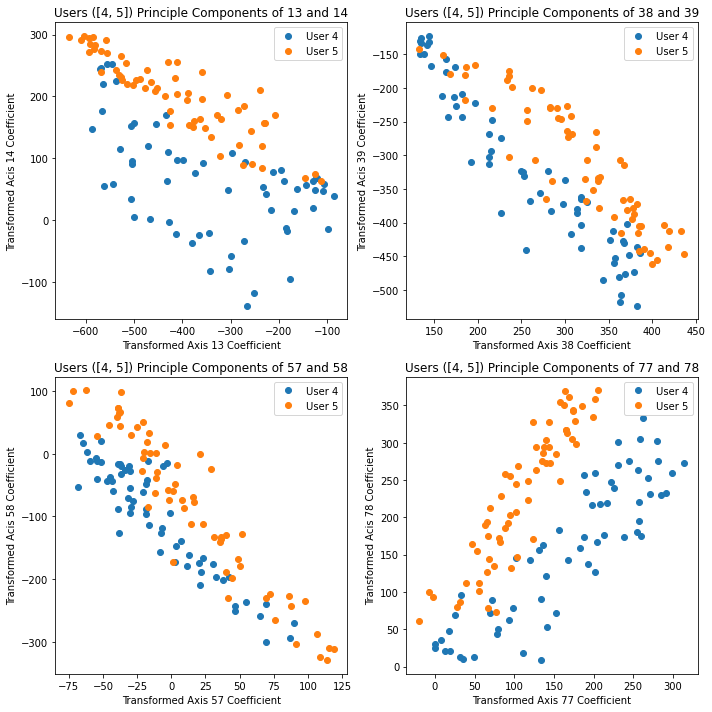

In [8]:
import math
import numpy as np
from matplotlib import pyplot as plt
import os 
import scipy.io as sio
def get_data():
    e_faces = np.load('e_faces_set_all_faces.npy')
    mean_face = np.load('mean_face_all_faces.npy')

    data = sio.loadmat('allFaces.mat')
    faces_all = []
    imgs = np.array(data['faces'])
    n = data['n'][0][0]
    m = data['m'][0][0]
    nfaces = np.ndarray.flatten(data['nfaces'])
    i = 0
    for j in range(len(nfaces)):
        user_faces = []
        for k in range(nfaces[j]):
            img = np.array(imgs[:, i + k]).reshape(n, m).T
            user_faces.append(img)
        i += nfaces[j]

        faces_all.append(user_faces)
    
    return e_faces, mean_face, faces_all

def plot_axes(users, axis1, axis2, e_faces, mean_face, faces_all, ax):
    # plt.clf()
    for user in users:
        user_faces = faces_all[user]
        pts = []
        for face in user_faces:
            face_eform = np.matmul(e_faces.T, face.flatten() - mean_face)
            pts.append((face_eform[axis1], face_eform[axis2]))
        ax.plot([pt[0] for pt in pts], [pt[1] for pt in pts], 'o', label='User {}'.format(user))
    ax.set_xlabel('Transformed Axis {} Coefficient'.format(axis1))
    ax.set_ylabel('Transformed Acis {} Coefficient'.format(axis2))
    ax.set_title('Users ({}) Principle Components of {} and {}'.format(users, axis1, axis2))
    ax.legend()
    return ax

e_faces, mean_face, faces_all = get_data()
# for i in range(100):
#     plot_axes([4, 5], i, i+1, e_faces, mean_face, faces_all)

fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0][0] = plot_axes([4, 5], 13, 14, e_faces, mean_face, faces_all, axes[0][0])
axes[0][1] = plot_axes([4, 5], 38, 39, e_faces, mean_face, faces_all, axes[0][1])
axes[1][0] = plot_axes([4, 5], 57, 58, e_faces, mean_face, faces_all, axes[1][0])
axes[1][1] = plot_axes([4, 5], 77, 78, e_faces, mean_face, faces_all, axes[1][1])
fig.tight_layout()
plt.show()

# Separating Axis sets:
# Users 4 & 5: (13, 14), (38, 39), (57, 58), (77, 78)

